In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
file_path = "./results/System1_Windows11_Graal.csv"
data = pd.read_csv(file_path)

In [46]:
# Convert AvgExecutionTime in ms
data['AvgExecutionTime'] = data['AvgExecutionTime'] / 1e6
data.head()

,ThreadType,NumThreads,AvgExecutionTime
0,PLATFORM,100,9.074225
1,VIRTUAL,100,0.271605
2,POOLED,100,1.447995
3,PLATFORM,200,17.381880
4,VIRTUAL,200,0.358830


In [47]:
# Add sequential number to enable equal spacing in diagrams
data['Seq'] = data.groupby(['ThreadType']).cumcount()
data.head()

,ThreadType,NumThreads,AvgExecutionTime,Seq
0,PLATFORM,100,9.074225,0
1,VIRTUAL,100,0.271605,0
2,POOLED,100,1.447995,0
3,PLATFORM,200,17.381880,1
4,VIRTUAL,200,0.358830,1


# All Threads

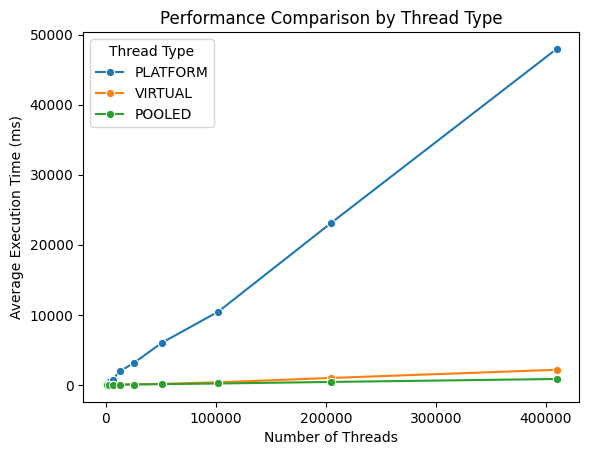

In [48]:
sns.lineplot(x='NumThreads', y='AvgExecutionTime', hue='ThreadType', marker='o', data=data)

plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads')
plt.ylabel('Average Execution Time (ms)')

plt.legend(title='Thread Type', loc='upper left')
plt.show()

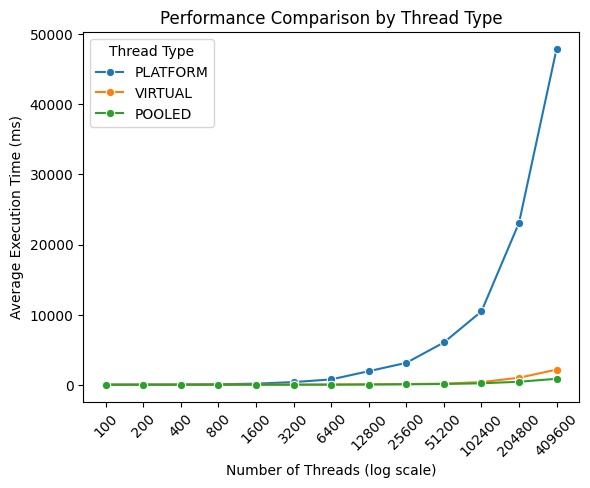

In [49]:
sns.lineplot(x='Seq', y='AvgExecutionTime', hue='ThreadType', data=data, marker='o', linestyle='-')

plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads (log scale)')
plt.ylabel('Average Execution Time (ms)')

plt.xticks(data['Seq'].unique(), data['NumThreads'].unique(), rotation=45)

plt.legend(title='Thread Type', loc='upper left')
plt.show()

# Detailed View on Virtual and Pooled

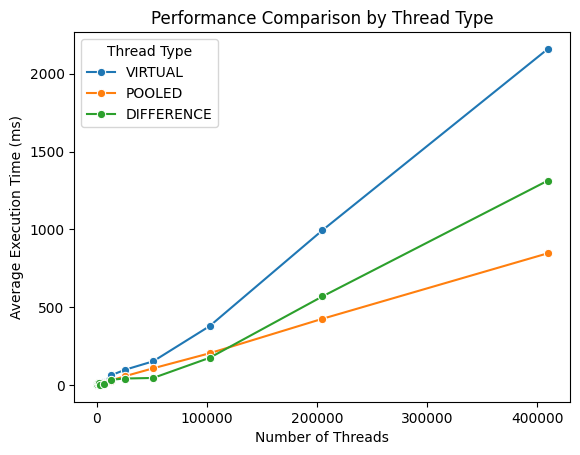

In [50]:
include_thread_types = ['VIRTUAL', 'POOLED']
filtered_data = data[data['ThreadType'].isin(include_thread_types)]

difference = filtered_data.copy()
difference['difference'] = difference.groupby('NumThreads')['AvgExecutionTime'].diff().abs()
difference.dropna(inplace=True)
difference.reset_index(drop=True, inplace=True)
difference['AvgExecutionTime'] = difference['difference']
difference['ThreadType'] = 'DIFFERENCE'
difference

filtered_data = pd.concat([filtered_data, difference])

sns.lineplot(x='NumThreads', y='AvgExecutionTime', hue='ThreadType', data=filtered_data, marker='o', linestyle='-')

plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads')
plt.ylabel('Average Execution Time (ms)')

plt.legend(title='Thread Type', loc='upper left')
plt.show()

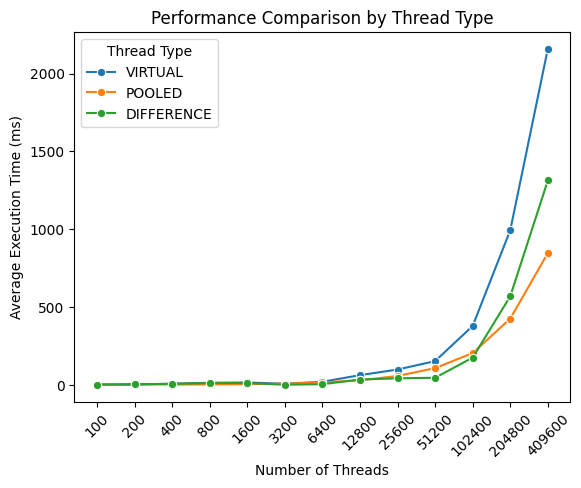

In [51]:
include_thread_types = ['VIRTUAL', 'POOLED']
filtered_data = data[data['ThreadType'].isin(include_thread_types)]

difference = filtered_data.copy()
difference['difference'] = difference.groupby('NumThreads')['AvgExecutionTime'].diff().abs()
difference.dropna(inplace=True)
difference.reset_index(drop=True, inplace=True)
difference['AvgExecutionTime'] = difference['difference']
difference['ThreadType'] = 'DIFFERENCE'
difference

filtered_data = pd.concat([filtered_data, difference])

sns.lineplot(x='Seq', y='AvgExecutionTime', hue='ThreadType', data=filtered_data, marker='o', linestyle='-')

plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads')
plt.ylabel('Average Execution Time (ms)')

plt.xticks(data['Seq'].unique(), data['NumThreads'].unique(), rotation=45)

plt.legend(title='Thread Type', loc='upper left')
plt.show()

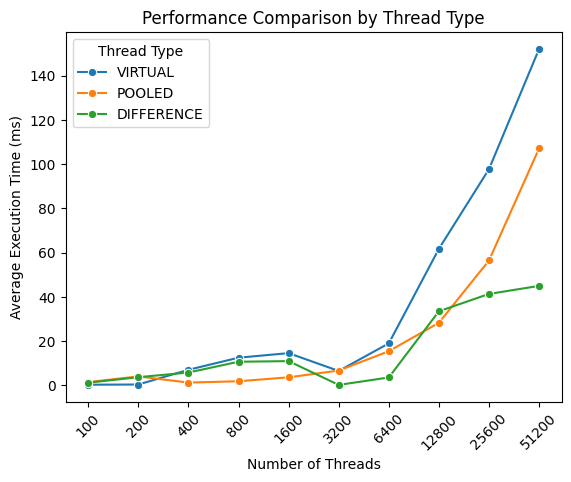

In [53]:
filtered_data_2 = filtered_data[filtered_data['NumThreads'] < 100000]

sns.lineplot(x='Seq', y='AvgExecutionTime', hue='ThreadType', data=filtered_data_2, marker='o', linestyle='-')

plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads')
plt.ylabel('Average Execution Time (ms)')

plt.xticks(filtered_data_2['Seq'].unique(), filtered_data_2['NumThreads'].unique(), rotation=45)

plt.legend(title='Thread Type', loc='upper left')
plt.show()